In [2]:
import sys
import os
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
%cd '/content/drive/MyDrive/ColabNotebooks/CSE527CV/kumar_arun_114708780_pa1'

/content/drive/MyDrive/ColabNotebooks/CSE527CV/kumar_arun_114708780_pa1


In [5]:
ls 

kumar_arun_114708780_hw1.ipynb  SourceImages/
Results/                        SourceImages_official.zip



**Problem 1.a Gaussian filter {15 pts}:** 

  (a) Write a function that takes two arguments, a width parameter and a sigma parameter, and returns a 2D array containing a Gaussian kernel of the desired dimension and variance. The peak of the Gaussian should be in the center of the array. Make sure to normalize the kernel such that the sum of all the elements in the array is 1. Use this function and the OpenCV’s `filter2D` routine to convolve the image and noisy image arrays with a 5x5 Gaussian kernel of sigma=1 and a 11x11 Gaussian kernel of sigma=2. There will be four output images from this problem, namely, image convolved with 5x5, and 11x11, noisy image convolved with 5x5, and 11x11. 

  (b) Write a function that takes an image and its noisy version, and return the Peak Signal-to-Noise Ratio (PSNR) value. Refer to https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio for its mathematical form. Pay attention that you might need to do convertion between different data types.

  Once you fill in and run the codes, the outputs will be saved under `Results` folder. Also images will be displayed in the notebook with PSNR marked in the titles. Please only fill in the missing part as indicated by `##########--WRITE YOUR CODE HERE--##########` and do not modify other parts. The grading for this question will be based on the ground-truth PSNR and your results.

  Lena image is credit to https://www.ece.rice.edu/~wakin/images/.

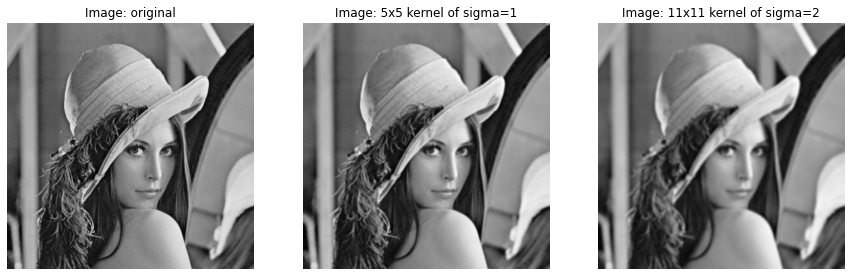

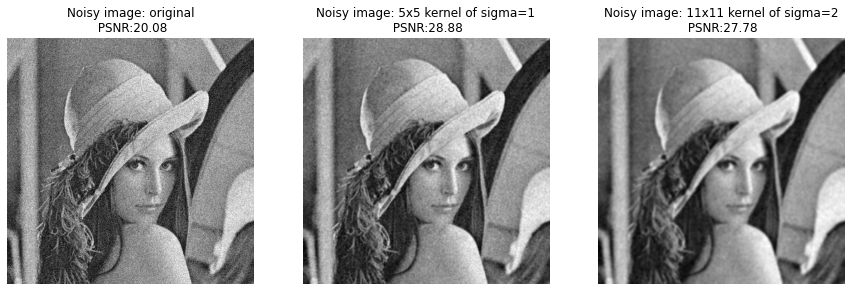

In [6]:
def genGaussianKernel(width, sigma):    
    ##########--WRITE YOUR CODE HERE--##########
    import math

    kernel_2d = np.zeros(shape=(width,width))
    kernel_2d = kernel_2d.astype("float32")

    sum = 0.0;
    kernel_2d = np.array(kernel_2d)  

    if width%2 == 0:
      mid = width/2
    else:
      mid = (width-1)/2

    for x in range(width):
      for y in range(width):
        #print(x-mid, " ", y-mid)
        kernel_2d[x][y] = math.exp(-(math.pow((x-mid),2)/(2*math.pow(sigma,2))) - (math.pow((y-mid),2)/(2*math.pow(sigma,2))))
        sum = sum + kernel_2d[x][y]
    
    for x in range(width):
      for y in range(width):
        kernel_2d[x][y] = kernel_2d[x][y]/sum

    #kernel_2d = np.array(kernel_2d)    
    ##########-------END OF CODE-------##########
    
    return kernel_2d


def PSNR(img, img_noise):
    ##########--WRITE YOUR CODE HERE--##########

    height,width = img.shape
    height_no,width_no = img_noise.shape

    img = img.astype("float32")
    img_noise = img_noise.astype("float32")

    PSNR=0

    for x in range(height):
      for y in range(width):
        PSNR = PSNR+ math.pow((img[x][y] - img_noise[x][y]),2)   
    
    PSNR = PSNR/(height*width)
    
    PSNR = 20 * math.log10((255) / math.sqrt(PSNR));
    
    ##########-------END OF CODE-------##########
    return PSNR
 
# Function to generate image with Gaussian noise
def addGaussianNoise(img, mean, std, seed=0):
    # suppose the input image is 2D gray image
    np.random.seed(seed)
    img_noise = img.astype(np.float32)/255.
    noise = np.random.normal(mean, std, img.shape)
    img_noise = img_noise + noise
    img_noise = np.clip(img_noise, 0., 1.)
    img_noise = (img_noise*255).astype(np.uint8)
    return img_noise

# Load images
img = cv2.imread('SourceImages/lena512.bmp', 0)

# Add Gaussian Noise
img_gnoise = addGaussianNoise(img, 0, 0.1)
PSNR_img_gnoise = PSNR(img, img_gnoise)
# Generate Gaussian kernels
kernel_1 = genGaussianKernel(5, 1)  # 5x5 kernel of sigma=1
kernel_2 = genGaussianKernel(11, 2)  # 11x11 kernel of sigma=2
# Convolve kernel with (noisy) image
img_kernel1 = cv2.filter2D(img, -1, kernel_1)
img_kernel2 = cv2.filter2D(img, -1, kernel_2)
img_gnoise_kernel1 = cv2.filter2D(img_gnoise, -1, kernel_1)
img_gnoise_kernel2 = cv2.filter2D(img_gnoise, -1, kernel_2)
PSNR_img_gnoise_kernel1 = PSNR(img, img_gnoise_kernel1)
PSNR_img_gnoise_kernel2 = PSNR(img, img_gnoise_kernel2)
# Write result images
if not os.path.exists("Results"):
  os.makedirs("Results")
cv2.imwrite("Results/P1_01.jpg", img_kernel1)
cv2.imwrite("Results/P1_02.jpg", img_kernel2)
cv2.imwrite("Results/P1_03.jpg", img_gnoise_kernel1)
cv2.imwrite("Results/P1_04.jpg", img_gnoise_kernel2)

# Plot results
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Image: original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_kernel1, 'gray')
plt.title('Image: 5x5 kernel of sigma=1')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_kernel2, 'gray')
plt.title('Image: 11x11 kernel of sigma=2')
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_gnoise, 'gray')
plt.title('Noisy image: original\n PSNR:{0:.2f}'.format(PSNR_img_gnoise))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gnoise_kernel1, 'gray')
plt.title('Noisy image: 5x5 kernel of sigma=1\n PSNR:{0:.2f}'
                        .format(PSNR_img_gnoise_kernel1))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_gnoise_kernel2, 'gray')
plt.title('Noisy image: 11x11 kernel of sigma=2\n PSNR:{0:.2f}'
                        .format(PSNR_img_gnoise_kernel2))
plt.axis("off")

plt.show()


# New Section

**Problem 1.b Median filter {15 pts}:** \\
(a) Write a function to generate an image with salt and pepper noise. The function takes three arguments, the input image, the probability that a pixel location has salt-pepper noise and a random seed for repitability. A simple implementation can be to select pixel locations with probability 'p' where noise occurs and then with equal probability set the pixel value at those location to be 0 or 255.(**Hint: Use np.random.uniform and np.random.choice**) 

 (b) Write a function to implement a median filter. The function takes two arguments, an image and a window size (if window size is 'k', then a kxk window is used to determine the median pixel value at a location) and returns the output image. **Do not** use any inbuilt library (like scipy.ndimage_filter) to directly generate the result. (**Hint: Use cv2.copyMakeBorder to add borders**)  

 You need to generate two noisy images corrupted by salt-and-pepper noise with noise probability equals 0.1 and 0.2. And then use median filter of window size=5 to denoise the two noisy images. You also need to denoise them with Gaussian filters. Try different parameters of Gaussian filters to get as higher PSNR as possible. Fill in all the missing parts and do not modify others.

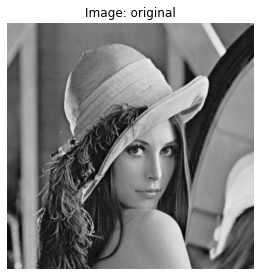

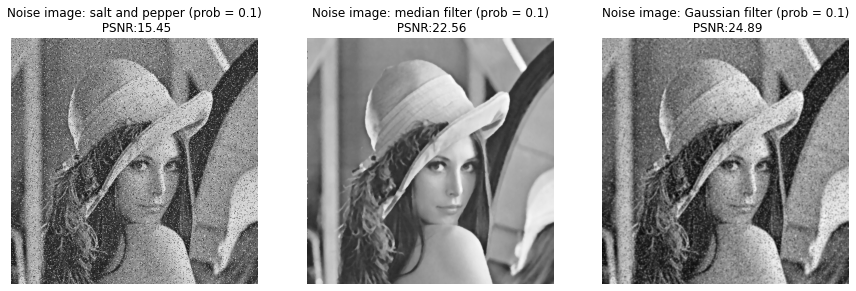

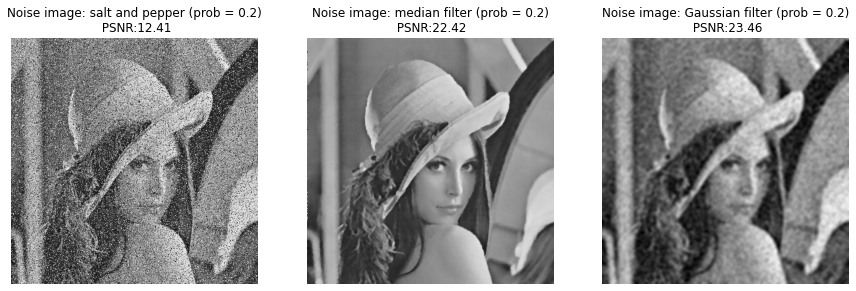

In [7]:
# Function to generate image with salt and pepper noise
def addSaltPepperNoise(img, prob = 0.1, seed=0):
  # suppose the input image is 2D gray image
  # with probability=prob each pixel is replaced with a pepper(0)
  # or a salt(255) in equal chance
  np.random.seed(seed)  
  ##########--WRITE YOUR CODE HERE--#########
  h,w = img.shape
  img_noise = [[0 for x in range(h)] for y in range(w)] 

  for x in range(h):
    for y in range(w):
      if np.random.uniform() <= prob:
        img_noise[x][y] = np.random.choice(2) * 255;
      else:
        img_noise[x][y] = img[x][y]

  img_noise = np.array(img_noise) 
  img_noise = (img_noise).astype(np.uint8) 
  ##########-------END OF CODE-------##########
  return img_noise
  
# Function to apply median filter (window size kxk) on the input image  
def medianFilter(img, window_size = 5):
  ##########--WRITE YOUR CODE HERE--##########
    temp = []
    indexer = 5 // 2
    filter_size = 5
    img_filtered = np.zeros((len(img),len(img[0])))

    img = cv2.copyMakeBorder(img, indexer, indexer, indexer, indexer, cv2.BORDER_REPLICATE)
    

    for i in range(len(img_filtered)):
        for j in range(len(img_filtered[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(img) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(img[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(img[i + z - indexer][j + k - indexer])

            temp.sort()
            img_filtered[i][j] = temp[len(temp) // 2]
            temp = []
  ##########-------END OF CODE-------##########
    return img_filtered

img_spnoise_p1 = addSaltPepperNoise(img)
PSNR_img_spnoise_p1 = PSNR(img, img_spnoise_p1)

img_spnoise_p1_MedianFilter = medianFilter(img_spnoise_p1)
PSNR_img_spnoise_p1_MedianFilter = PSNR(img, img_spnoise_p1_MedianFilter)


img_spnoise_p2 = addSaltPepperNoise(img, 0.2)
PSNR_img_spnoise_p2 = PSNR(img, img_spnoise_p2)

img_spnoise_p2_MedianFilter = medianFilter(img_spnoise_p2)
PSNR_img_spnoise_p2_MedianFilter = PSNR(img, img_spnoise_p2_MedianFilter)

# Generate Gaussian kernels
kernel_1 = genGaussianKernel(5, 1)
kernel_2 = genGaussianKernel(11, 3)

# Convolve filters with image and noisy image
img_spnoise_p1_GaussianFilter = cv2.filter2D(img_spnoise_p1, -1, kernel_1)
PSNR_img_spnoise_p1_GaussianFilter = PSNR(img, img_spnoise_p1_GaussianFilter)

img_spnoise_p2_GaussianFilter = cv2.filter2D(img_spnoise_p2, -1, kernel_2)
PSNR_img_spnoise_p2_GaussianFilter = PSNR(img, img_spnoise_p2_GaussianFilter)

cv2.imwrite("Results/P1_05.jpg", img_spnoise_p1_MedianFilter)    
cv2.imwrite("Results/P1_06.jpg", img_spnoise_p1_GaussianFilter)    
cv2.imwrite("Results/P1_07.jpg", img_spnoise_p2_MedianFilter)    
cv2.imwrite("Results/P1_08.jpg", img_spnoise_p2_GaussianFilter)  

# Plot results
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Image: original')
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_spnoise_p1, 'gray')
plt.title('Noise image: salt and pepper (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_spnoise_p1_MedianFilter, 'gray')
plt.title('Noise image: median filter (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1_MedianFilter))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_spnoise_p1_GaussianFilter, 'gray')
plt.title('Noise image: Gaussian filter (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1_GaussianFilter))
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_spnoise_p2, 'gray')
plt.title('Noise image: salt and pepper (prob = 0.2)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p2))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_spnoise_p2_MedianFilter, 'gray')
plt.title('Noise image: median filter (prob = 0.2)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p2_MedianFilter))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_spnoise_p2_GaussianFilter, 'gray')
plt.title('Noise image: Gaussian filter (prob = 0.2)\n PSNR:{0:.2f}'
                  .format(PSNR_img_spnoise_p2_GaussianFilter))
plt.axis("off")

plt.show()

**Problem 2.a Separable filters {20 pts}:** The Gaussian kernel is separable, which means that convolution with a 2D Gaussian can be accomplished by convolving the image with two 1D Gaussians, one in the x direction and the other one in the y direction. Perform an 11x11 convolution with sigma = 3 from question 1 using this scheme. You can still use `filter2D` to convolve the images with each of the 1D kernels. Verify that you get the same results with what you did with 2D kernels by computing the difference image between the results from the two methods. This difference image should be close to black. Include your code and results in your colab Notebook file. There is no output image from this part. Be sure to display the result images in the notebook.

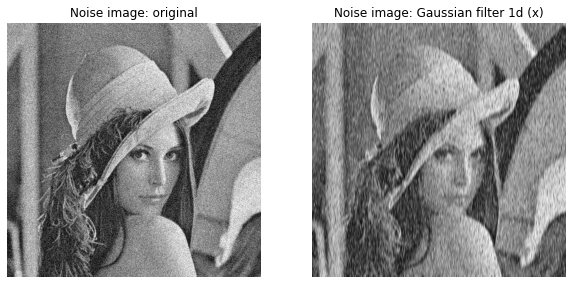

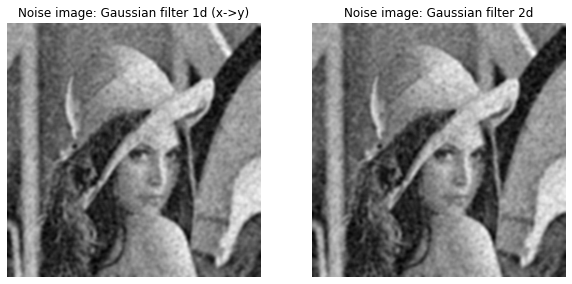

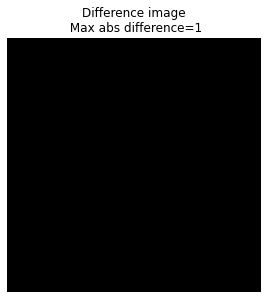

In [8]:
def genGausKernel1D(length, sigma):
    ##########--WRITE YOUR CODE HERE--########## 
    
    r, c = (length, 1)
    kernel_1d = np.zeros((r, c), dtype=np.float32)

    sum = 0.0
    mid = length//2
    
    for x in range(r):
        kernel_1d[x][0] = math.exp((-(math.pow((x-mid),2))/(2*math.pow(sigma,2))))
    
    sum = np.sum(kernel_1d)

    kernel_1d = kernel_1d/sum;
    #kernel_1d = np.array(kernel_1d)    
    
    ##########-------END OF CODE-------##########
    return kernel_1d

# Generate two 1d kernels here
width = 11
sigma = 3
kernel_x = genGausKernel1D(width, sigma)
kernel_y = np.transpose(genGausKernel1D(width, sigma))

# Generate a 2d 11x11 kernel with sigma of 3 here as before
kernel_2d = genGaussianKernel(width, sigma)

# Convolve with img_gnoise
img_gnoise_kernel1d_x = cv2.filter2D(img_spnoise_p2, -1, kernel_x) 
img_gnoise_kernel1d_xy = cv2.filter2D(img_gnoise_kernel1d_x, -1, kernel_y) 
img_gnoise_kernel2d = cv2.filter2D(img_spnoise_p2, -1, kernel_2d)

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gnoise, 'gray')
plt.title('Noise image: original')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_gnoise_kernel1d_x, 'gray')
plt.title('Noise image: Gaussian filter 1d (x)')
plt.axis("off")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gnoise_kernel1d_xy, 'gray')
plt.title('Noise image: Gaussian filter 1d (x->y)')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_gnoise_kernel2d, 'gray')
plt.title('Noise image: Gaussian filter 2d')
plt.axis("off")

# Compute the difference array here
img_diff =  np.abs((img_gnoise_kernel1d_xy.astype(np.float32)
       -img_gnoise_kernel2d.astype(np.float32))).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.imshow(img_diff, 'gray', vmin=0, vmax=255)
plt.title('Difference image\n Max abs difference={0:d}'
                        .format(np.max(img_diff)))
plt.axis("off")
plt.show()


**Problem 2.b Floating point operations(FLOPs) comparison {10 pts}:** Please calculate the FLOPs needed for the two separable 1D kernels and the 2D kernel.(**Hint: Since the image shape doesn't change, the kernel will convolve with the image height * width times.**)  

In [9]:
def cal_1d_FLOPs(img, kernel):
  FLOPs = 0
  ##########--WRITE YOUR CODE HERE--##########
  img_h,img_w = img.shape
  convovle = img_h * img_w
  
  k_h,k_w = kernel.shape
  conv_k = k_h*k_w+(k_h*k_w-1)

  FLOPs = convovle * conv_k

  #########-------END OF CODE-------##########
  return FLOPs

def cal_2d_FLOPs(img, kernel):
  FLOPs = 0
##########--WRITE YOUR CODE HERE--##########
  img_h,img_w=img.shape
  
  k_h,k_w = kernel.shape
  conv_k = k_h*k_w+(k_h*k_w-1)

  convovle = (img_h) * (img_w )

  FLOPs = convovle * conv_k
  
#########-------END OF CODE-------##########
  return FLOPs

FLOPs_x = cal_1d_FLOPs(img_spnoise_p2, kernel_x)
FLOPs_y = cal_1d_FLOPs(img_gnoise_kernel1d_x, kernel_y)
FLOPs_1D = FLOPs_x + FLOPs_y
print('1D Filter FLOPs:', FLOPs_1D)
FLOPs_2D = cal_2d_FLOPs(img_spnoise_p2, kernel_2d)
print('2D Filter FLOPs:', FLOPs_2D)

1D Filter FLOPs: 11010048
2D Filter FLOPs: 63176704


**Problem 3 Difference of Gaussians {20 pts}:** Difference of Gaussians (DoG) is a feature enhancement algorithm. You can obtain a DoG by subtracting a Gaussian filter of sigma=K\*s from a Gaussian filter of sigma=s. In this question, we will use K=1.6 and sigma=2. Plot the DoG kernel using the `Matplotlib` function `plot`. Use the `Matplotlib` function `plot_surface` to generate a 3D plot of DoG. Include your code and results in your Colab Notebook file. Apply the filter to the noisy image generated in the previous question. 

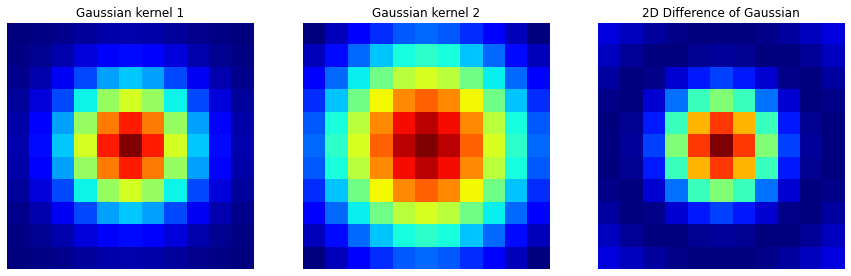

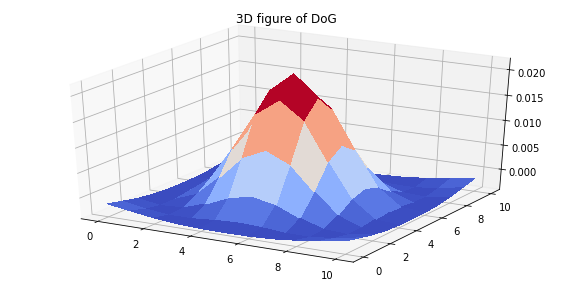

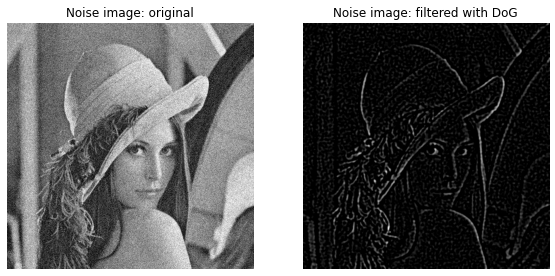

In [10]:
from mpl_toolkits.mplot3d import Axes3D
##########--WRITE YOUR CODE HERE--##########

# Create your Gaussian kernel
Gaussian_kernel_1 = genGaussianKernel(11, 2)
Gaussian_kernel_2 = genGaussianKernel(11, 1.6*2)

# Create your Difference of Gaussian
DoG = Gaussian_kernel_1 - Gaussian_kernel_2

##########-------END OF CODE-------##########

# Plot Gaussian and Laplacian
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(Gaussian_kernel_1, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel 1')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(Gaussian_kernel_2, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel 2')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(DoG, interpolation='none', cmap=cm.jet)
plt.title('2D Difference of Gaussian')
plt.axis("off")

# Plot the 3D figure of DoG
##########--WRITE YOUR CODE HERE--##########

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

X = np.arange(0, 11, 1)
Y = np.arange(0, 11, 1)
X, Y = np.meshgrid(X, Y)
Z = DoG[:,:]

plt.title('3D figure of DoG')
ax.plot_surface( X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.show()

##########-------END OF CODE-------##########

img_gnoise_DoG = cv2.filter2D(img_gnoise, -1, DoG) 

# Plot results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_gnoise, 'gray')
plt.title('Noise image: original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gnoise_DoG, 'gray')
plt.title('Noise image: filtered with DoG')
plt.axis("off")

cv2.imwrite("Results/P3_01.jpg", img_gnoise_DoG);


**Problem 4 Seam Carving {30 pts}:**  In this problem, you need to implement Seam Carving. More specifically, you need to do vertical seam removing. You can read this paper first: http://graphics.cs.cmu.edu/courses/15-463/2007_fall/hw/proj2/imret.pdf <br>

You can implement this in the following way. <br>
(1) First, implement the function to calculate the gradient. Here are some instructions: https://docs.opencv.org/4.5.1/d5/d0f/tutorial_py_gradients.html. You can use any filter you want to calculate the gradient(Sobel, Scharr, etc.). **{5pts}**<br>
(2) Then you can implement the energy function. **{5pts}**<br>
(3) Then you can implement the function to calculate the cumulative minimum energy.**{10 pts}**<br>
(4) Finally, you can implement the function to find and remove one vertical seam.**{10 pts}**





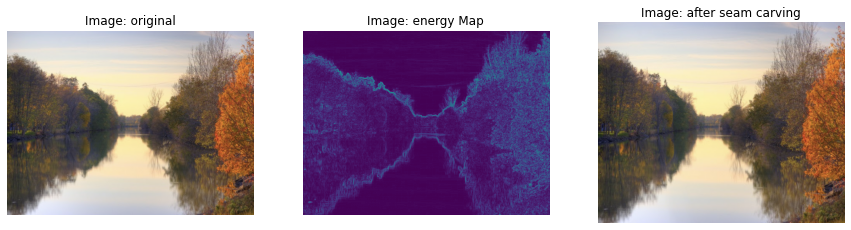

In [11]:
import copy
def cal_grad(image):

  ##########--WRITE YOUR CODE HERE--##########
  grad = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3) 
  ##########-------END OF CODE-------##########

  return grad

def energy_func(image):

  ##########--WRITE YOUR CODE HERE--##########

  sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3) #gradient in x
  sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3) #gradient in y

  energy = np.zeros((len(image),len(image[0]))) # assign Zero values and  dimensions to energy matrix
  energy = energy.astype("float32")# change type as int... since we will be doing manipulations in pixel values while calculating energy

  l,b = energy.shape

  for x in range(l):
    for y in range(b):
      energy[x][y] =  math.sqrt(\
                     (math.pow(sobelx[x][y][0],2) + math.pow(sobely[x][y][0], 2))+\
                     (math.pow(sobelx[x][y][1],2) + math.pow(sobely[x][y][1], 2))+\
                     (math.pow(sobelx[x][y][2],2) + math.pow(sobely[x][y][2], 2)))
  
  # Energy function at each pizxel is sqrt of sum of squares of gradients for the each r.g.b.
  # for a particuler pixels      
  
  ##########-------END OF CODE-------##########
  
  return energy

def cal_cumulative_min_energy(energy):
  ##########--WRITE YOUR CODE HERE--##########

  r, c = energy.shape
  cum_energy = energy.copy()
    
  for i in range(1, r):
    for j in range(0, c):
      # To account for index -1 on x axis, condition j==0 is wrtitten seprately
      # searches for mininum energy matrix in the next 3 cells

      if j == 0:
          idx = np.argmin(cum_energy[i - 1, j:j + 2])
          min_energy = cum_energy[i - 1, idx + j]
      else:
          idx = np.argmin(cum_energy[i - 1, j - 1:j + 2])
          min_energy = cum_energy[i - 1, idx + j - 1]

      cum_energy[i, j] += min_energy

  ##########-------END OF CODE-------##########
  return cum_energy

def delete_seam(cal_cumulative_min_map, image):
  #This function is used to remove one signle seam
  #You should return a new image

  ##########--WRITE YOUR CODE HERE--##########

  r, c, _ = image.shape

  # We'll be removing all pixels from the image which
  # have False value later on
  mask = np.ones((r, c), dtype=np.bool)

  # Find the position of the smallest element in the
  # last row of M
  j = np.argmin(cal_cumulative_min_map[-1])
  mask[r-1, j] = False

  for i in reversed(range(r-1)):
      # Mark the pixels for deletion
      # Mask matric stores the backtracking info from the last row to first row
      
      min_ind = max(j-1,0)
      max_ind = min(j+1, r-1)

      j = min_ind+(np.argmin(cal_cumulative_min_map[i][min_ind:max_ind]))
      mask[i, j] = False
  
  #plt.imshow(mask)
  mask = np.stack([mask] * 3, axis=2)
  
  # Delete all the pixels marked False in the mask,
  # and resize it to the new image dimensions
  new_image = image[mask].reshape((r, c - 1, 3))
  

  ##########-------END OF CODE-------##########

  return new_image

# Get energy
img = cv2.imread('SourceImages/Seam_Carving_Sample.png')
ori_img = copy.deepcopy(img)
energy_map = energy_func(img)
cumulative_min_energy = cal_cumulative_min_energy(energy_map)

#Seam Carving
#Total remove 100 seams
#It may takes you about 10 minutes
for i in range(100):
  img = delete_seam(cumulative_min_energy, img)
  new_energy_map = energy_func(img)
  cumulative_min_energy = cal_cumulative_min_energy(new_energy_map)
seam_carving_img = img

# Plot results
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB))
plt.title('Image: original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(energy_map)
plt.title('Image: energy Map')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(seam_carving_img, cv2.COLOR_BGR2RGB))
plt.title('Image: after seam carving')
plt.axis("off")

# Write out results
cv2.imwrite("Results/P4_01.jpg", energy_map);
cv2.imwrite("Results/P4_02.jpg", seam_carving_img);



## Submission guidelines
---
Your need to submit a single zip file to Blackboard described as follow.

Please generate a pdf file that includes a ***google shared link*** (explained in the next paragraph). This pdf file should be named as ***Surname_Givenname_SBUID_hw*\*.pdf** (example: Jordan_Michael_111234567_hw1.pdf for this assignment).

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_SBUID_hw**** in your Google Drive with your Stony Brook account. The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Surname_Givenname_SBUID_PA1
        |---Results
        |---SourceImages
        |---CSE527-HW1-fall20.ipynb
```
Note that this folder should be in your Google Drive with your Stony Brook account.

Then right click this folder, click ***Get shareable link***, in the People textfield, enter the TA's email: ***bjha@cs.stonybrook.edu***, ***li.wenchen@stonybrook.edu***, ***yifeng.huang@stonybrook.edu***. Make sure that TAs who have the link **can edit**, ***not just*** **can view**, and also **uncheck** the **Notify people** box.

Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in blackboard. 

To submit to Blackboard, zip ***Surname_Givenname_SBUID_hw*\*.pdf** and ***Surname_Givenname_SBUID_hw**** folder together and name your zip file as ***Surname_Givenname_SBUID_hw*\*.zip**. 

The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_SBUID_hw1' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on Edstem. Based on the amount of email that we have received in past years, there might be dealys in replying to personal emails. Please ask questions on Edstem and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.

Late submission penalty: <br>
There will be a 10% penalty per day for late submission. However, you will have 4 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.


In [13]:
seam_carving_img.shape

(912, 1120, 3)